# Data Analysis With Python
### Using the movie dataset

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing and inspection of the dataset

In [2]:
data = pd.read_csv('movies.csv')
data.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


#### Check if there are missing values in the dataset

In [3]:
data.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

#### From the above result we found out that there are missing values in the data for some attributes such as movie rating, movie score, year released, movie votes, writer's name, movie budget which is the higest column with the missing values, gross, company and the movies runtime.

#### In other to fix this, I'll replace the missing values in the numeric columns with the median value for that column and the mode for the non numeric columns.

### Data Cleaning

In [4]:
num_df = data.select_dtypes(exclude='object')
non_num_df = data.select_dtypes(include='object')
non_num_df.head()

,name,rating,genre,released,director,writer,star,country,company
0,The Shining,R,Drama,"June 13, 1980 (United States)",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures


In [5]:
from sklearn.impute import SimpleImputer

# Extracting the numeric and non-numeric columns from the dataset
num_df = data.select_dtypes(include=['number']).columns
non_num_df = data.select_dtypes(exclude=['number']).columns

# Replacing missing values
numeric_imputer = SimpleImputer(strategy='median')
non_numeric_imputer = SimpleImputer(strategy='most_frequent')

data[num_df] = numeric_imputer.fit_transform(data[num_df])
data[non_num_df] = non_numeric_imputer.fit_transform(data[non_num_df])

# Checking for missing values again
data.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

#### Checking data types

In [6]:
data.dtypes

name         object
rating       object
genre        object
year        float64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
data.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980.0,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980.0,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


#### From the data above, we noticed that the year column and the year in the released column do not tally. Hence we extract the original year from the released column and replace it in the yea column, and the same for the country.

In [8]:
import re
# Extracting the year 
data['year'] = data['released'].apply(lambda x: re.search(r'\b\d{4}\b', x).group())

# Extract country
data['country'] = data['released'].apply(lambda x: re.search(r'\(([^)]+)\)', x).group(1))

In [9]:
data.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [10]:
data.nunique()

name        7512
rating        12
genre         19
year          41
released    3414
score         72
votes        936
director    2949
writer      4535
star        2814
country       61
budget       413
gross       7472
company     2385
runtime      138
dtype: int64

#### Removing duplicates

In [12]:
data['company'].drop_duplicates(inplace=True)
data.shape

(7668, 15)

### Exploring Relationships (Correlations) between variables

In [16]:
data['year'] = data['year'].astype('int64')
num_df = data.select_dtypes(exclude='object')
num_df.head(3)

,year,score,votes,budget,gross,runtime
0,1980,8.4,927000.0,19000000.0,46998772.0,146.0
1,1980,5.8,65000.0,4500000.0,58853106.0,104.0
2,1980,8.7,1200000.0,18000000.0,538375067.0,124.0


In [17]:
# Computing the pearson product moment correlation coefficient
correlation = num_df.corr()
correlation

,year,score,votes,budget,gross,runtime
year,1.000000,0.106221,0.217995,0.284125,0.252759,0.120573
score,0.106221,1.000000,0.409157,0.061931,0.185563,0.399407
votes,0.217995,0.409157,1.000000,0.460968,0.632120,0.309151
budget,0.284125,0.061931,0.460968,1.000000,0.745881,0.273371
gross,0.252759,0.185563,0.632120,0.745881,1.000000,0.244380
runtime,0.120573,0.399407,0.309151,0.273371,0.244380,1.000000


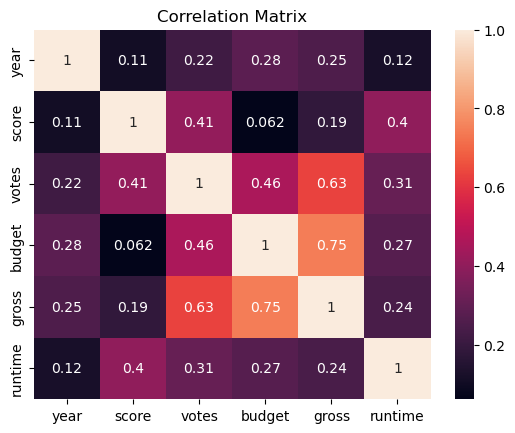

In [22]:
# Visualize the correlation coefficients
# Using the seaborn library to plot the correlation coefficient
sns.heatmap(correlation,annot=True)
plt.title('Correlation Matrix')
plt.show()

#### From the correlation analysis given above, we notice a strong positive correlation between gross and budget,gross and votes. However,there is no indication of a strong relationships among other variables.

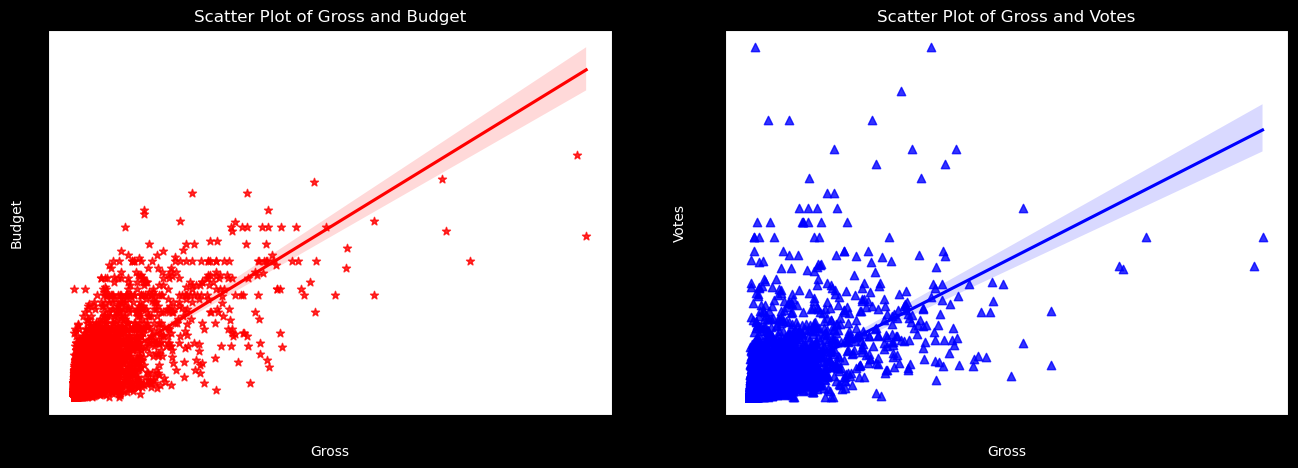

In [33]:
# Scatter plot of gross and budget to further show the nature and type of relationship
fig,axes = plt.subplots(1,2,figsize=(16,5),facecolor='black')
sns.regplot(x='gross',y='budget',ax=axes[0],data=num_df,marker='*',color='red')
axes[0].set_title('Scatter Plot of Gross and Budget',color='white')
axes[0].set_xlabel('Gross',color='white')
axes[0].set_ylabel('Budget',color='white')
sns.regplot(x='gross',y='votes',ax=axes[1],data=num_df,marker='^',color='blue')
axes[1].set_title('Scatter Plot of Gross and Votes',color='white')
axes[1].set_xlabel('Gross',color='white')
axes[1].set_ylabel('Votes',color='white')
plt.show()

#### The two scatter plot above shows a positive linear trend between the variables involved, i.e, gross and budget, and gross and votes.

### Further Analysis
#### Finding the distribustion of the gross, budget, runtime, score and votes across various genre

In [39]:
data.groupby('genre')[['gross','budget','votes','runtime','score']].sum()

,gross,budget,votes,runtime,score
genre,,,,,
Action,2.440824e+11,8.858572e+10,239574188.0,187904.0,10576.1
Adventure,4.605804e+10,1.704706e+10,43358242.0,46107.0,2686.5
Animation,8.020266e+10,2.235357e+10,43153458.0,31165.0,2288.0
Biography,2.093164e+10,1.059738e+10,40057318.0,53107.0,3114.7
Comedy,9.824637e+10,4.920528e+10,121865748.0,227849.0,13905.5
Crime,2.153730e+10,1.205024e+10,50102551.0,61568.0,3676.0
Drama,5.816094e+10,3.324386e+10,105888171.0,171478.0,10160.6
Family,2.157897e+09,3.480000e+08,753550.0,1099.0,70.0
Fantasy,1.684707e+09,7.502000e+08,2587900.0,4372.0,264.3


#### The above analysis shows that action movies has the highest gross, as well as the highet budget and votes. Comedy has the higest runtime and score

#### In the same way let's look at the distribution based on average

In [40]:
data.groupby('genre')[['gross','budget','votes','runtime','score']].mean()

,gross,budget,votes,runtime,score
genre,,,,,
Action,1.431569e+08,5.195644e+07,140512.720235,110.207625,6.202991
Adventure,1.078643e+08,3.992286e+07,101541.550351,107.978923,6.291569
Animation,2.372860e+08,6.613482e+07,127672.952663,92.204142,6.769231
Biography,4.724975e+07,2.392185e+07,90422.839729,119.880361,7.030926
Comedy,4.376230e+07,2.191772e+07,54283.183964,101.491759,6.193987
Crime,3.908766e+07,2.186977e+07,90930.219601,111.738657,6.671506
Drama,3.831419e+07,2.189977e+07,69755.053360,112.963109,6.693412
Family,1.961725e+08,3.163636e+07,68504.545455,99.909091,6.363636
Fantasy,3.828879e+07,1.705000e+07,58815.909091,99.363636,6.006818


#### In the analysis above, the average scores of each genre was examined. History has the highest average score of 8.30,  Musical has the highest average runtime of 145.00 minutes, Mystery has the highest average Votes of 230125.75, Animation has the highest average budget of 66134820.0 and Biography has the highest average gross of 43762300.0

### Cluster Analysis
#### Preparing the data for the cluster analysis

In [44]:
# Grouping the data by genre and applying aggregation function.
grouped = data.groupby('genre').agg({
    'gross': 'mean',
    'budget': 'mean',
    'votes': 'sum',
    'runtime': 'mean',
    'score': 'mean'
})
grouped

# Converting the data into a dataframe

dts = pd.DataFrame(grouped)

In [47]:
# Loading the modules for cluster analysis

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [48]:
# Preprocessing the data

scalar = StandardScaler()
scaled_data = scalar.fit_transform(dts)

In [64]:
# Fitting a kmeans cluster model with k=2

optimal_clusters = 2  # Set this to the number of clusters you found optimal
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_data)
dts['cluster'] = clusters

C:\Users\Egbin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [65]:
dts.head(4)

,gross,budget,votes,runtime,score,cluster
genre,,,,,,
Action,1.431569e+08,5.195644e+07,239574188.0,110.207625,6.202991,0
Adventure,1.078643e+08,3.992286e+07,43358242.0,107.978923,6.291569,0
Animation,2.372860e+08,6.613482e+07,43153458.0,92.204142,6.769231,0
Biography,4.724975e+07,2.392185e+07,40057318.0,119.880361,7.030926,1


In [66]:
clusters.view()

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### The cluster array given above shows that the first three genres (action, adventure, animation and family) belongs to cluster one, all other genre belongs to cluster two. The properties of each cluster is examined in the chart given below.

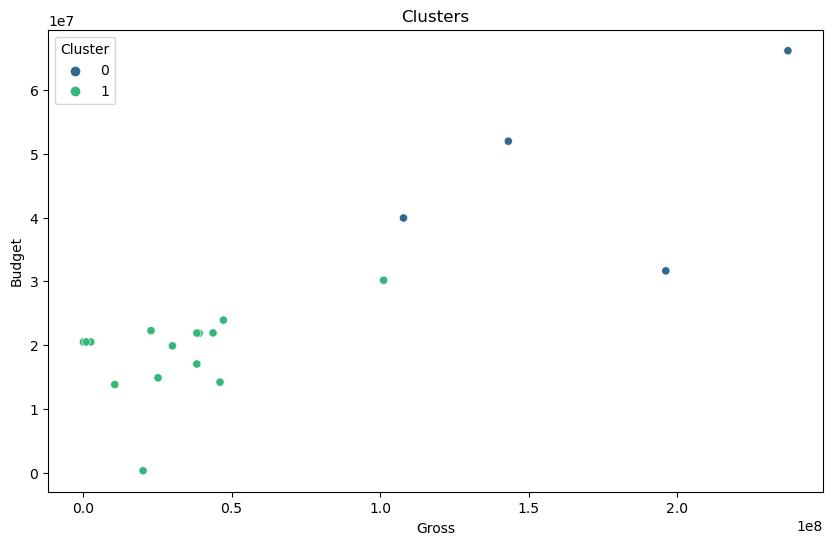

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dts['gross'], y=dts['budget'], hue=dts['cluster'], palette='viridis',data=dts)
plt.title('Clusters')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.legend(title='Cluster')
plt.show()

#### The cluster model identified 2 clusters with size 15 and 4 respectvely. The cluster plot reveals that movies within cluster first cluster (0) have higher budget and gross compare to those in the second (1) cluster. 